In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install googlesearch-python

  Preparing metadata (setup.py) ... done
  Created wheel for googlesearch-python: filename=googlesearch_python-1.2.3-py3-none-any.whl size=4209 sha256=a33d009c1df93bf295bcde7628ec78510f75564cf10bf1271147c225df8077ec
  Stored in directory: /root/.cache/pip/wheels/98/24/e9/6c225502948c629b01cc895f86406819281ef0da385f3eb669
Successfully built googlesearch-python


In [ ]:
df=pd.read_csv('/content/malicious_phish.csv')

print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
df.nunique()

url     641119
type         4
dtype: int64

In [ ]:
df.duplicated().sum()

10066

In [ ]:
df.drop_duplicates()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
df_filtered = df[df['type'].isin(['benign', 'phishing'])]
df_filtered.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign


In [ ]:
df = df_filtered

In [ ]:
import re
from urllib.parse import urlparse
from googlesearch import search
!pip install tldextract
from tldextract import extract as get_tld
from tldextract import extract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))


def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

#pip install googlesearch-python


def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

def count_https(url):
    return url.count('https')

def tld_length(url):
    tld_info = extract(url)
    tld = tld_info.suffix  # Use suffix attribute to get the Top-Level Domain
    try:
        return len(tld)
    except: TypeError


def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

df['count-letters']= df['url'].apply(lambda i: letter_count(i))


#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,tld_length(i)))


df['tld_length'] = df['url'].apply(lambda i: tld_length(i))

In [ ]:
df["count-https"] = df["url"].apply(lambda i: i.count("https"))
df["count-http"] = df["url"].apply(lambda i: i.count("http"))
df["count%"] = df["url"].apply(lambda i: i.count("%"))
df["count?"] = df["url"].apply(lambda i: i.count("?"))
df["count-"] = df["url"].apply(lambda i: i.count("-"))
df["count="] = df["url"].apply(lambda i: i.count("="))
df["url_length"] = df["url"].apply(lambda i: len(str(i)))
df["hostname_length"] = df["url"].apply(lambda i: len(urlparse(i).netloc))

<Axes: xlabel='type', ylabel='Count'>

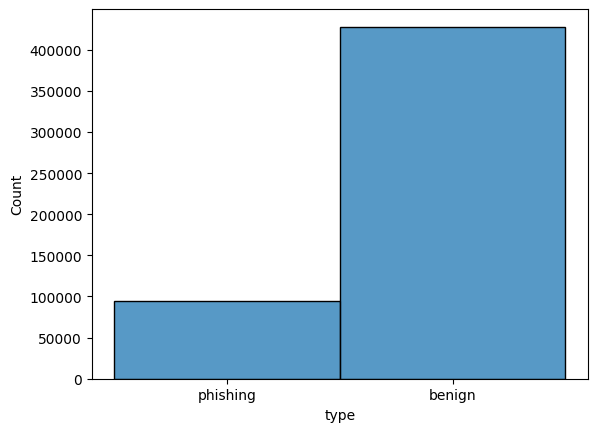

In [ ]:
sns.histplot(df.type)

In [ ]:
df.type.value_counts()

benign      428103
phishing     94111
Name: type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_code']=le.fit_transform(df['type'])
df['type_code'].value_counts()

1    10000
0    10000
Name: type_code, dtype: int64

In [ ]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,tld_length,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,type_code
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,6,0,0,0,0,1,0,16,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,3,0,0,0,0,0,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,3,0,0,0,0,0,0,31,0,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,1,1,2,0,0,3,0,...,3,0,1,0,0,16,0,118,11,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0,1,2,0,0,6,0,...,3,0,0,0,0,1,0,45,0,0


<ipython-input-36-683815e48689>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = features_df.corr()


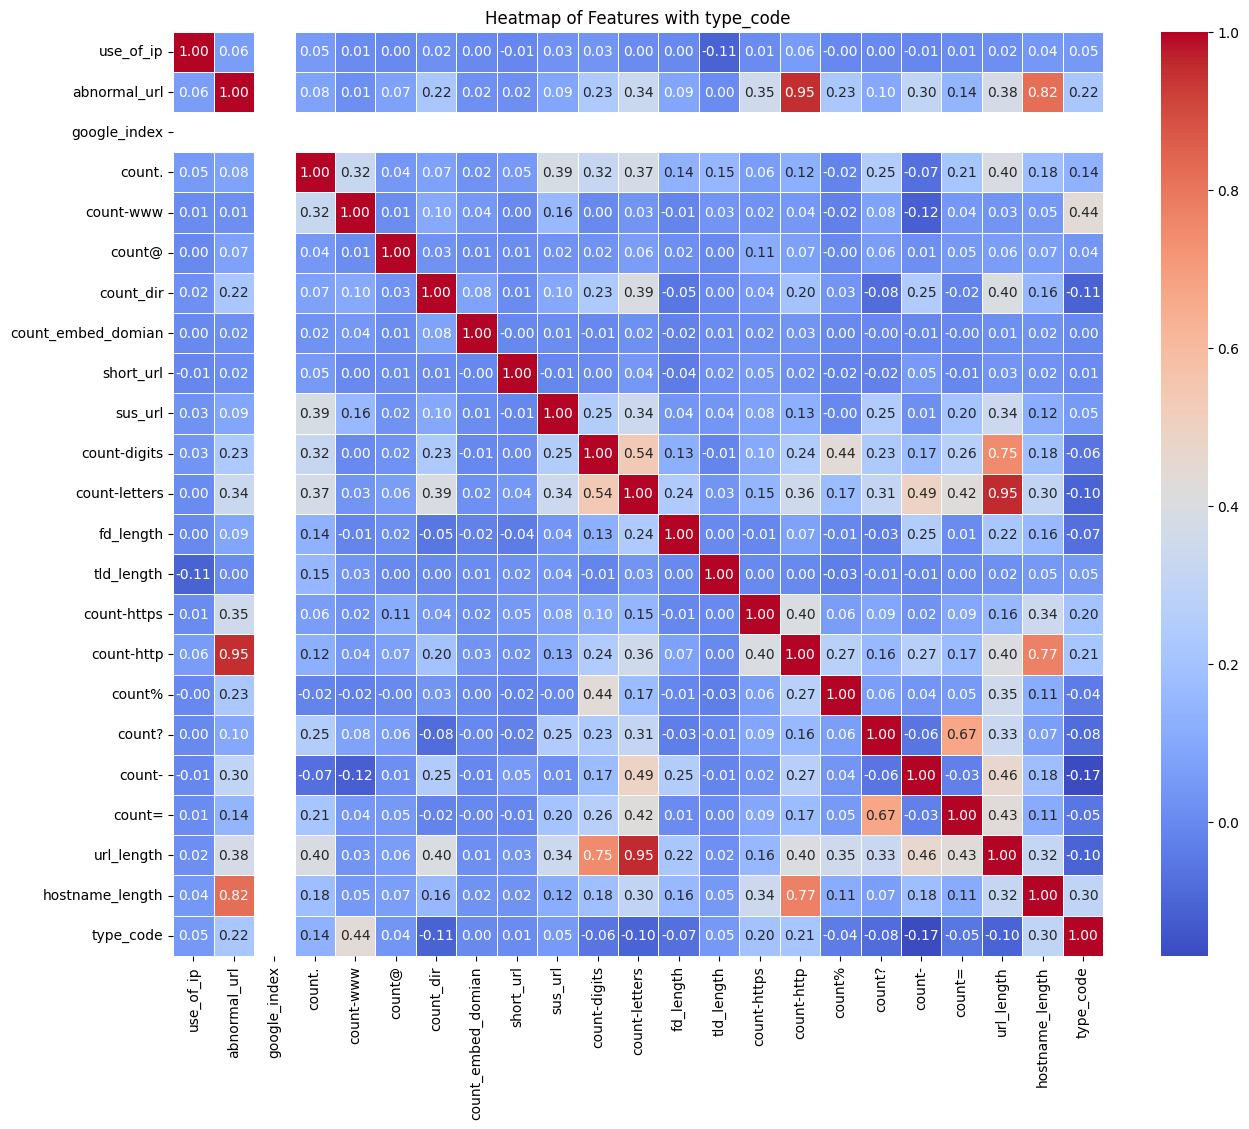

In [ ]:
# Create a DataFrame with columns other than 'url'
features_df = df.drop(columns=['url', 'type'])

# Assuming 'type_code' is the column you want to predict
target_column = 'type_code'

# Add the target column to the features DataFrame
features_df[target_column] = df[target_column]

# Calculate the correlation matrix
correlation_matrix = features_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the heatmap
plt.title(f"Heatmap of Features with {target_column}")

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

1    10000
0    10000
Name: type_code, dtype: int64

In [ ]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

# Since deep learning models like CNN, LSTM, CNN-LSTM are already been discussed in the paper, lets compare it with more classification models such as XGboost classifier, Light GBM classifier, Rnadom forest classifier

**1) XGboost classifier**

In [ ]:
from sklearn import metrics
import xgboost as xgb
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)
print(classification_report(y_test,y_pred_x,target_names=['benign','phishing']))

score = metrics.accuracy_score(y_test, y_pred_x)
print("accuracy:   %4.2f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
    phishing       0.94      0.87      0.90     18822

    accuracy                           0.97    104443
   macro avg       0.96      0.93      0.94    104443
weighted avg       0.97      0.97      0.97    104443

accuracy:   0.97


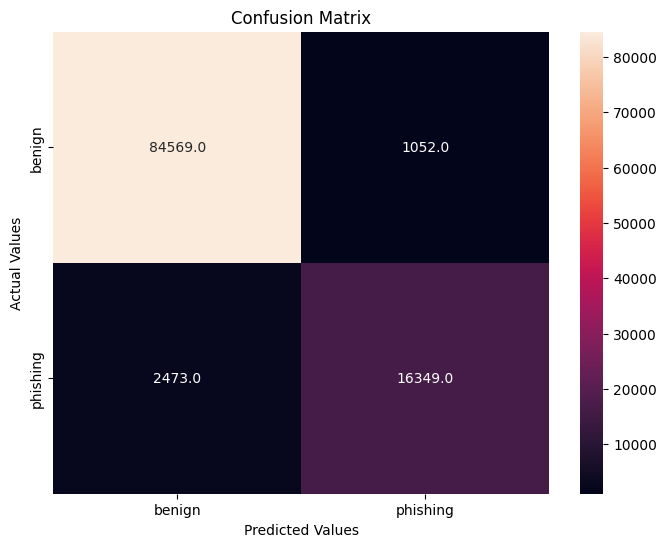

In [ ]:
cm = confusion_matrix(y_test, y_pred_x)
cm_df = pd.DataFrame(cm,
                     index = ['benign','phishing'],
                     columns = ['benign','phishing'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

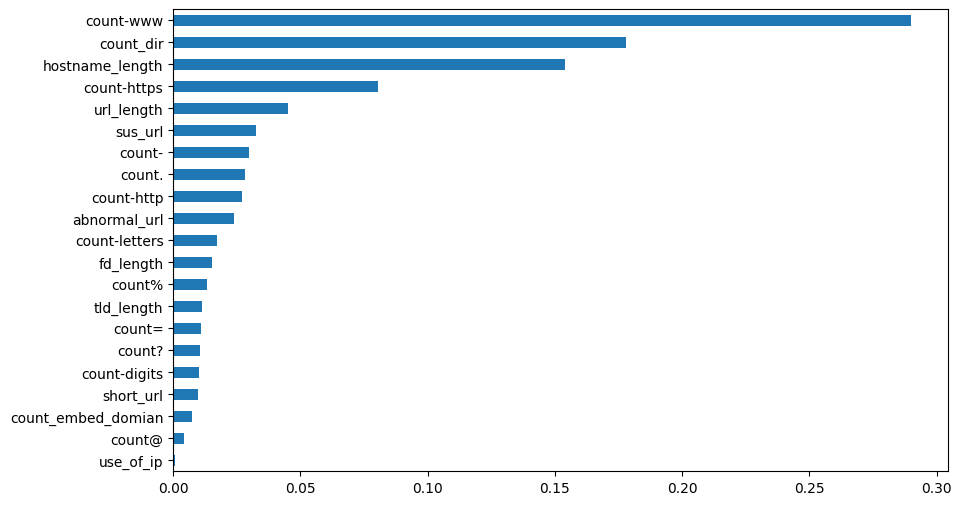

In [ ]:
feat_importances = pd.Series(xgb_c.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))
plt.show()

The above figure shows the importance of each of the features in the trained XGboost model.

2) Light GBM model

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb = LGBMClassifier(boosting_type='gbdt', n_jobs=5, silent=True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)

y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test, y_pred_lgb, target_names=['benign', 'phishing']))

accuracy = accuracy_score(y_test, y_pred_lgb)
print("Accuracy: %4.2f" % accuracy)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 75289, number of negative: 342482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 417771, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180216 -> initscore=-1.514885
[LightGBM] [Info] Start training from score -1.514885
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
    phishing       0.94      0.86      0.90     18822

    accuracy                           0.96    104443
   macro avg       0.95      0.92      0.94    104443
weighted avg       0.96      0.96      0.96    104443

Accuracy: 0.96


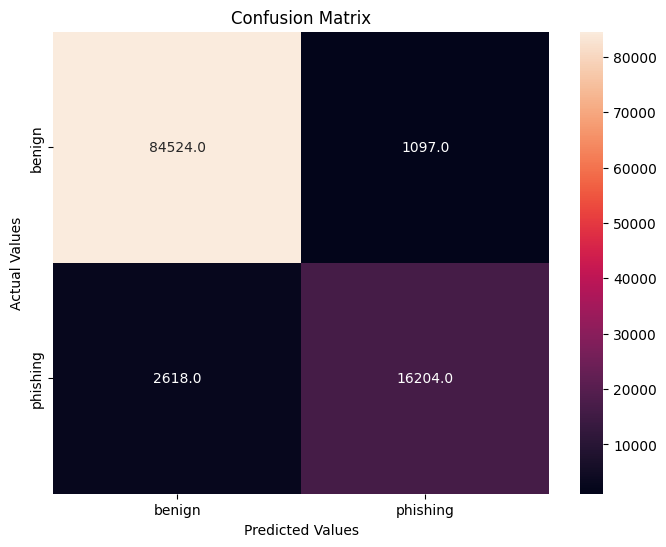

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgb)
cm_df = pd.DataFrame(cm,
                     index = ['benign','phishing'],
                     columns = ['benign','phishing'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

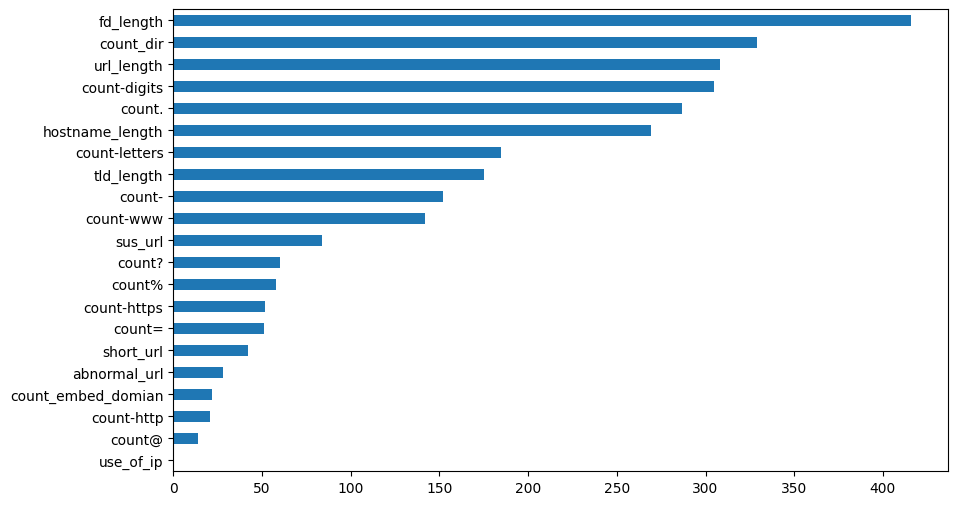

In [ ]:
feat_importances = pd.Series(lgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))
plt.show()

As you can see there is no importance for use_of_ip feature for building the model.

3) Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign','phishing']))

score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %4.3f" % score)

              precision    recall  f1-score   support

      benign       0.98      0.99      0.98     85621
    phishing       0.93      0.89      0.91     18822

    accuracy                           0.97    104443
   macro avg       0.95      0.94      0.94    104443
weighted avg       0.97      0.97      0.97    104443

accuracy:   0.968


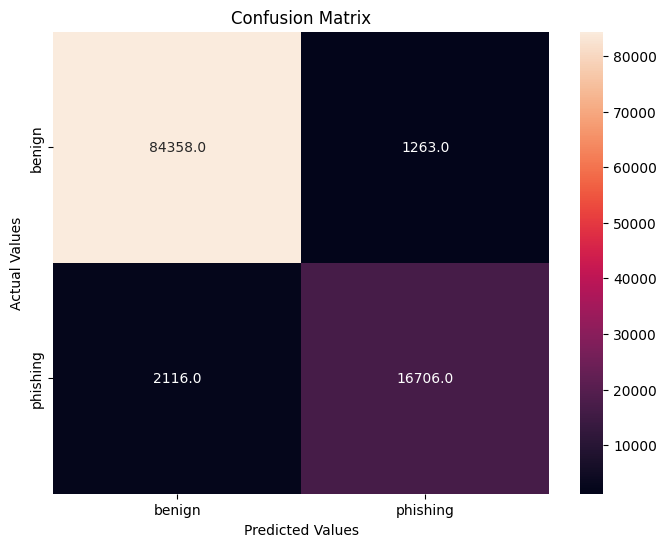

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index = ['benign','phishing'], columns = ['benign','phishing'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

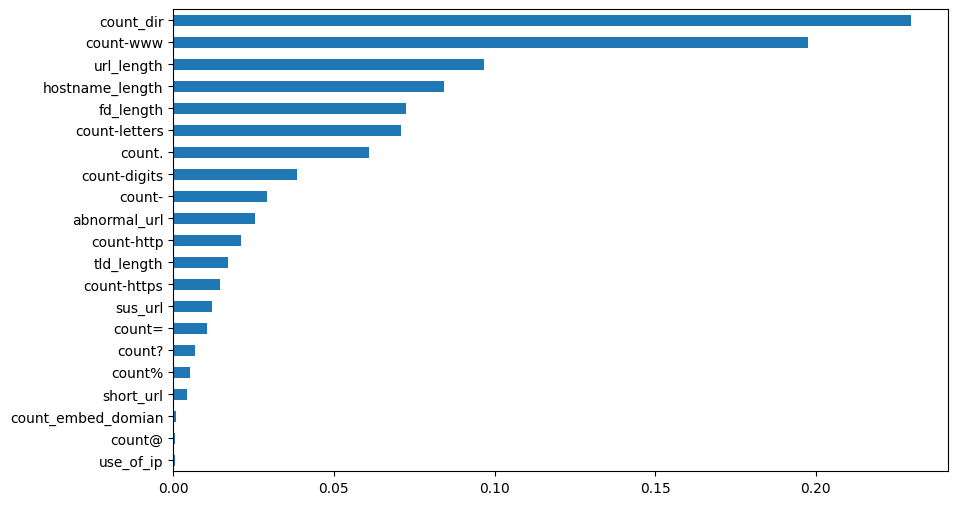

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))
plt.show()

# Lets try a custom Deep learning model for classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Define the custom neural network class
class CustomNN(nn.Module):
    def __init__(self, input_size, num_layers, dropout_rate, activation):
        super(CustomNN, self).__init__()
        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, input_size))
            layers.append(nn.Dropout(dropout_rate))
            layers.append(activation)
        self.model = nn.Sequential(*layers)
        self.output_layer = nn.Linear(input_size, 2)  # Assuming binary classification

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        return x

# Assuming 'type_code' is the column you want to predict
target_column = 'type_code'

# Predictor Variables
X = df[['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
        'count_dir', 'count_embed_domian', 'short_url', 'count-https',
        'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
        'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
        'count-letters']]

# Target Variable
y = df[target_column]

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Min-Max Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=5)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define hyperparameters
activation_functions = [nn.ReLU(), nn.Tanh(), nn.Sigmoid()]
epochs_list = [10, 20, 30, 40, 50, 60]
batch_sizes = [16, 32, 64, 100, 500, 1200, 1500]
optimizers = [optim.Adam, optim.SGD]
num_layers_list = [1, 2, 3]
dropout_rates = [0.1, 0.2, 0.3]

best_accuracy = 0.0
best_hyperparameters = {}

# Iterate over hyperparameters
for activation in activation_functions:
    for epochs in epochs_list:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                for num_layers in num_layers_list:
                    for dropout_rate in dropout_rates:
                        # Create the model
                        model = CustomNN(input_size=X_train_tensor.shape[1], num_layers=num_layers, dropout_rate=dropout_rate, activation=activation)

                        # Choose the optimizer
                        optimizer_instance = optimizer(model.parameters(), lr = 0.001)

                        # Loss function
                        criterion = nn.CrossEntropyLoss()

                        # Training loop
                        for epoch in range(epochs):
                            # Set model to training mode
                            model.train()

                            # Forward pass
                            y_pred = model(X_train_tensor)

                            # Compute the loss
                            loss = criterion(y_pred, y_train_tensor)

                            # Backward pass and optimization
                            optimizer_instance.zero_grad()
                            loss.backward()
                            optimizer_instance.step()

                        # Evaluate on the test set
                        with torch.no_grad():
                            model.eval()
                            y_pred = model(X_test_tensor)
                            _, predicted = torch.max(y_pred, 1)
                            accuracy = accuracy_score(y_test, predicted)

                        print(f"Activation: {activation.__class__.__name__}, Epochs: {epochs}, Batch Size: {batch_size}, Optimizer: {optimizer.__name__}, Layers: {num_layers}, Dropout: {dropout_rate}, Accuracy: {accuracy*100.0}")

                        # Check if this set of hyperparameters gives the best accuracy
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            print("************** New MAX ACCURACY **************")
                            best_hyperparameters = {
                                'activation': activation.__class__.__name__,
                                'epochs': epochs,
                                'batch_size': batch_size,
                                'optimizer': optimizer.__name__,
                                'num_layers': num_layers,
                                'dropout_rate': dropout_rate
                            }

print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy*10.0)


Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, Layers: 1, Dropout: 0.1, Accuracy: 51.824999999999996
************** New MAX ACCURACY **************
Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, Layers: 1, Dropout: 0.2, Accuracy: 50.025
Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, Layers: 1, Dropout: 0.3, Accuracy: 50.0
Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, Layers: 2, Dropout: 0.1, Accuracy: 50.0
Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, Layers: 2, Dropout: 0.2, Accuracy: 50.0
Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, Layers: 2, Dropout: 0.3, Accuracy: 60.075
************** New MAX ACCURACY **************
Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, Layers: 3, Dropout: 0.1, Accuracy: 50.0
Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, Layers: 3, Dropout: 0.2, Accuracy: 50.0
Activation: ReLU, Epochs: 10, Batch Size: 16, Optimizer: Adam, L

# Feature extraction using Bert and training it on our best model XGboost which gave 97% accuracy

In [ ]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip -q install transformers
!pip -q install torch

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

In [ ]:

df = pd.read_csv('/content/malicious_phish.csv')

df_filtered = df[df['type'].isin(['benign', 'phishing'])]
df_benign = df_filtered[df_filtered['type'] == 'benign'].head(10000)
df_phishing = df_filtered[df_filtered['type'] == 'phishing'].head(10000)

df_result = pd.concat([df_benign, df_phishing])

df_result = df_result.sample(frac=1, random_state=42).reset_index(drop=True)
print(df_result)
df = df_result


                                                     url      type
0                                   secbusiness101.co.za  phishing
1                               imdb.com/name/nm0159198/    benign
2      insiderpages.com/doctors/Robert-M-Wertheimer-M...    benign
3                    flickr.com/photos/swank/4633280541/    benign
4      http://www.biaobang.cn/js/?http://us.battle.ne...  phishing
...                                                  ...       ...
19995                                    sunny-works.com  phishing
19996                                    uomanhterax.org  phishing
19997  acronyms.thefreedictionary.com/Vanier+College+...    benign
19998       uk.ask.com/wiki/Charles-Fran%C3%A7ois_Dupuis    benign
19999  http://drive-google-com.fanalav.com/d346ae2d28...  phishing

[20000 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
encoded_data = le.fit_transform(df['type'])

In [ ]:
df['type'] = encoded_data

In [ ]:
df.type.value_counts()

1    10000
0    10000
Name: type, dtype: int64

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def extract_features(text):
    input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)])
    with torch.no_grad():
        outputs = model(input_ids)
        hidden_states = outputs[2]
    token_vecs = []
    for layer in range(-4, 0):
        token_vecs.append(hidden_states[layer][0])
    features = []
    for token in token_vecs:
        features.append(torch.mean(token, dim=0))
    return torch.stack(features)

In [ ]:
features = []
for i in range(len(df)):
    features.append(extract_features(df.iloc[i]["url"]))
features = torch.cat(features).numpy()

In [ ]:
types = df['type'].values

In [ ]:
features_reshaped = features.reshape((20000, -1))
dataset = np.hstack((features_reshaped, types.reshape((-1, 1))))

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)
print(classification_report(y_test,y_pred_x,target_names=['benign','phishing']))

score = metrics.accuracy_score(y_test, y_pred_x)
print("accuracy:   %4.3f" % score)

              precision    recall  f1-score   support

      benign       1.00      0.99      0.99      2055
    phishing       0.99      1.00      0.99      1945

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

accuracy:   0.994
